In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part1 简易线型图

必要的两个元素：ax与fig

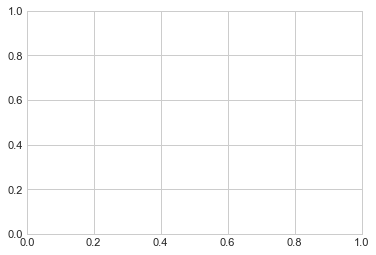

In [72]:
fig = plt.figure()#中间的白框
ax = plt.axes()#坐标系

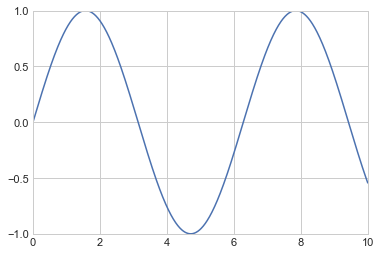

In [74]:
fig = plt.figure()#中间的白框
ax = plt.axes()#坐标系
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x))

也可以用plt.plot

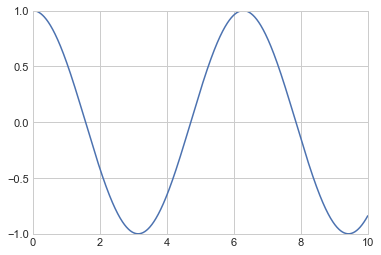

In [76]:
plt.plot(x,np.cos(x))

画多条线：重复调用plt.plot（）

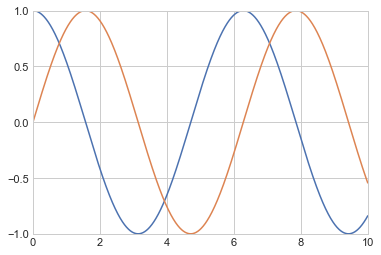

In [77]:
plt.plot(x,np.cos(x))
plt.plot(x,np.sin(x))

### 线条的颜色与风格 color = ？ linestyle = ？

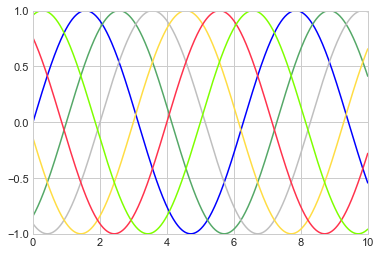

In [78]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

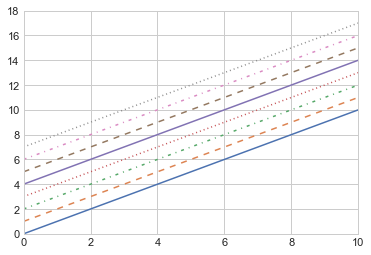

In [79]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

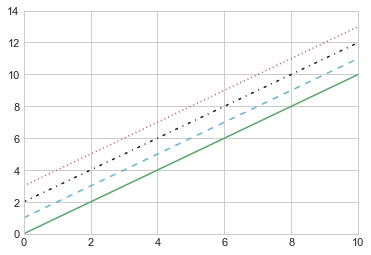

In [80]:
#更快捷的方式：
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### 调整坐标轴的上下限

(-1.5, 1.2)

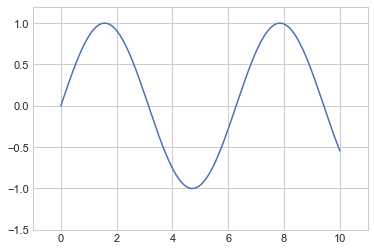

In [83]:
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5,1.2)

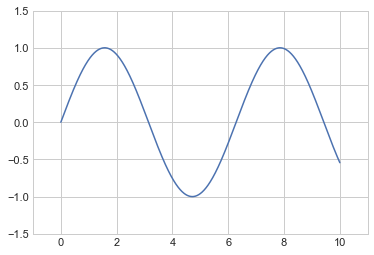

In [82]:
#另一种方法： 使用plt.axis(xmin,xmax,ymin,ymax)
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

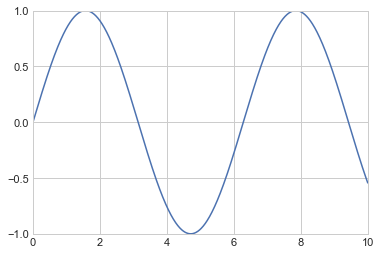

In [84]:
#自动收紧坐标轴：
plt.plot(x, np.sin(x))
plt.axis('tight');

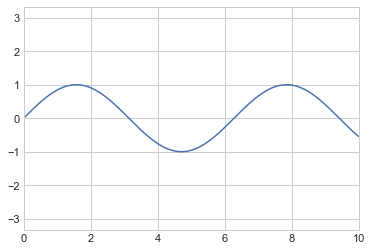

In [85]:
#显示图形分辨率为1：1：
plt.plot(x, np.sin(x))
plt.axis('equal');

### 设置图形标签

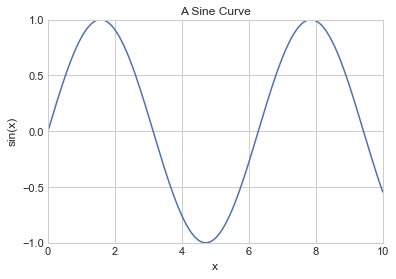

In [86]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

创建图例：

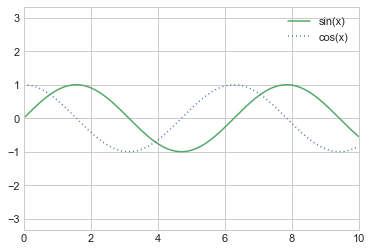

In [87]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

### plt vs ax

plt.xlabel() → ax.set_xlabel()

plt.ylabel() → ax.set_ylabel()

plt.xlim() → ax.set_xlim()

plt.ylim() → ax.set_ylim()

plt.title() → ax.set_title()

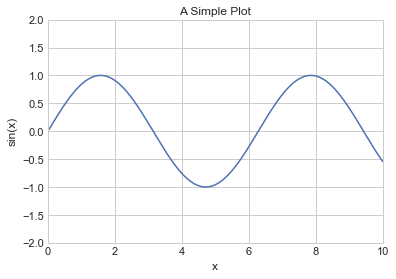

In [89]:
#用ax作图，一般一次性在ax.set（）中设置完所有参数
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Part2 简易散点图

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### 用plt.plot画散点图

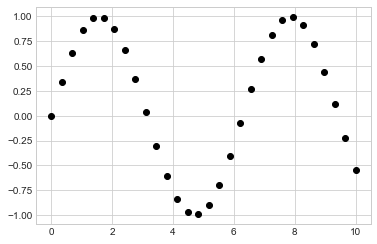

In [3]:
x = np.linspace(0,10,30)
y= np.sin(x)
plt.plot(x,y,'o',color = 'black')

支持多种多样的marker

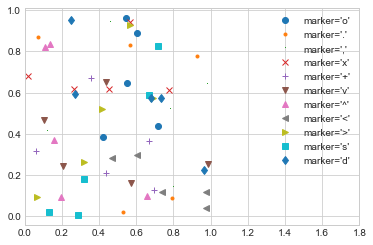

In [4]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

散点与线组合起来

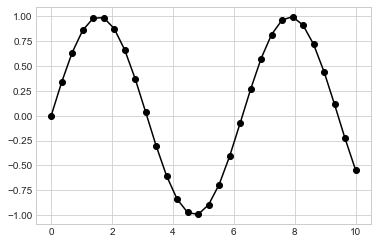

In [5]:
plt.plot(x,y,'-ok')  
#   - 直线  o 点   k 黑色

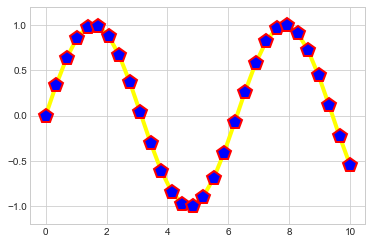

In [9]:
plt.plot(x, y, '-p', color='yellow',
         markersize=15, linewidth=4,
         markerfacecolor='blue',
         markeredgecolor='red',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

# 用plt.scatter 画散点图

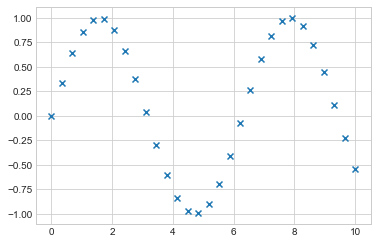

In [10]:
plt.scatter(x,y,marker = 'x')

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level:

可以利用散点的颜色和大小表示额外维度的信息

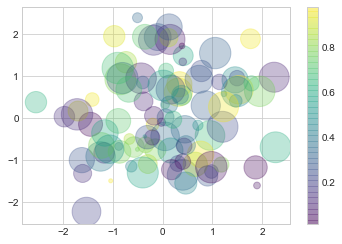

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

# 示例：iris数据集的可视化


We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

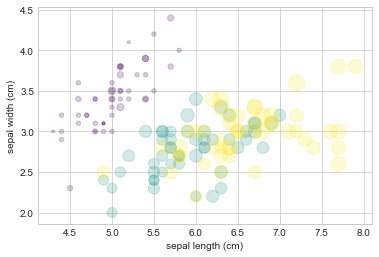

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0],features[1],alpha = 0.2, s = 100*features[3],c=iris.target, cmap="viridis")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.plot在数据量大的时候效率比plt.scatter要高不少！

# Part3 可视化异常处理

基本误差线 (errorbar)

<Container object of 3 artists>

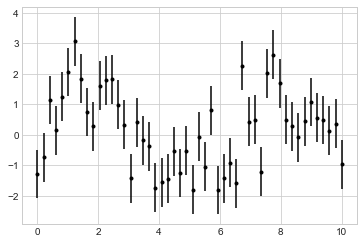

In [16]:
x = np.linspace(0,10,50)
dy =0.8
y = np.sin(x) + dy*np.random.randn(50)
plt.errorbar(x,y,yerr=dy,fmt = '.k')

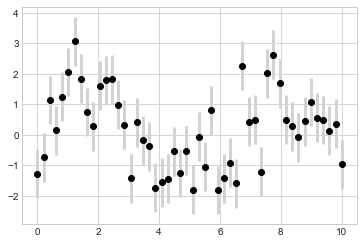

In [17]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

连续误差

利用 plt.fill_betweem()方法

# Part 4密度图与等高线图


Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: plt.contour for contour plots, plt.contourf for filled contour plots, and plt.imshow for showing images. This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will us

# Example: 三维函数的可视化

In [29]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

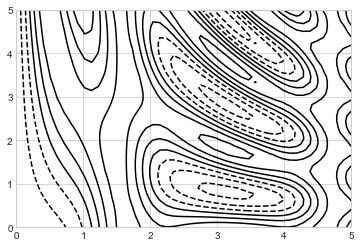

In [31]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines. Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument. Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

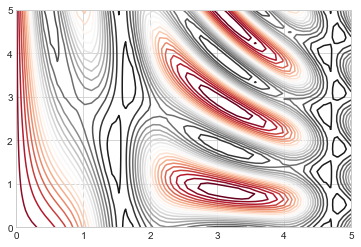

In [32]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

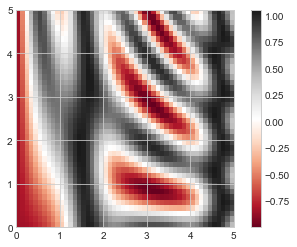

In [33]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

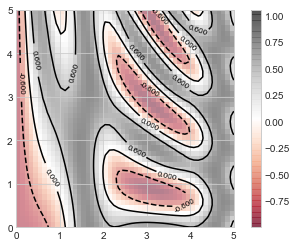

In [35]:

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

# PART5 直方图与密度分布

(array([   7.,   20.,   76.,  190.,  274.,  239.,  137.,   49.,    6.,    2.]),
 array([-3.34890594, -2.6582512 , -1.96759645, -1.27694171, -0.58628697,
         0.10436777,  0.79502252,  1.48567726,  2.176332  ,  2.86698674,
         3.55764149]),
 <a list of 10 Patch objects>)

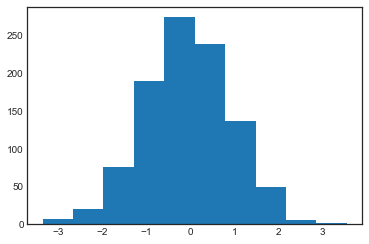

In [36]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)
plt.hist(data)

.hist()的各种各样的可选参数

(array([ 0.00868741,  0.00868741,  0.01303111,  0.02606223,  0.03474963,
         0.02606223,  0.07818668,  0.11293631,  0.13899854,  0.1954667 ,
         0.28234078,  0.34749635,  0.36487116,  0.41265191,  0.41265191,
         0.42133932,  0.30840301,  0.30840301,  0.24324744,  0.21284151,
         0.13899854,  0.0955615 ,  0.06515557,  0.05212445,  0.01737482,
         0.0043437 ,  0.0043437 ,  0.        ,  0.0043437 ,  0.0043437 ]),
 array([-3.34890594, -3.11868769, -2.88846944, -2.6582512 , -2.42803295,
        -2.1978147 , -1.96759645, -1.73737821, -1.50715996, -1.27694171,
        -1.04672346, -0.81650522, -0.58628697, -0.35606872, -0.12585047,
         0.10436777,  0.33458602,  0.56480427,  0.79502252,  1.02524076,
         1.25545901,  1.48567726,  1.71589551,  1.94611375,  2.176332  ,
         2.40655025,  2.6367685 ,  2.86698674,  3.09720499,  3.32742324,
         3.55764149]),
 <a list of 1 Patch objects>)

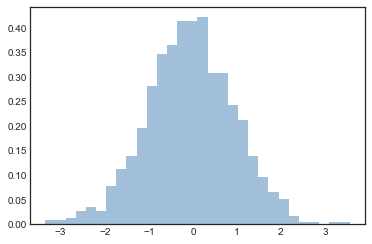

In [38]:
plt.hist(data,bins = 30, normed = True, alpha =0.5, histtype = 'stepfilled', color = 'steelblue',edgecolor = 'none')

多个（不同参数的正太分布）直方分布图堆叠在一起的效果：

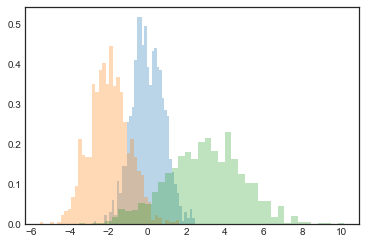

In [39]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

只计算样本数而不作图：

In [42]:
counts, bin_edges = np.histogram(data,bins=5)
print(counts)#每个bin里的count
print(bin_edges)#每个bin的分界线

[ 27 266 513 186   8]
[-3.34890594 -1.96759645 -0.58628697  0.79502252  2.176332    3.55764149]


# 二维频次直方图与数据区间划分

创建一个多元高斯分布

In [47]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


plt.hist2d: Two-dimensional histogram

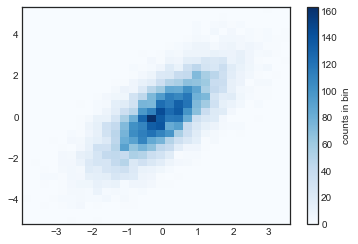

In [45]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

histogram2d  与 np.histogram功能类似

In [49]:
counts, xedges, yedges = np.histogram2d(x, y, bins=5)
print(counts)
print(xedges)
print(yedges)

[[   39.    67.     8.     0.     0.]
 [   48.  1012.   977.    49.     0.]
 [    4.   747.  3602.  1245.    14.]
 [    0.    20.   676.  1246.   140.]
 [    0.     0.     7.    52.    47.]]
[-3.77776831 -2.25905543 -0.74034255  0.77837033  2.29708321  3.81579609]
[-5.34216011 -3.28298738 -1.22381465  0.83535808  2.89453081  4.95370354]


利用六边形划分

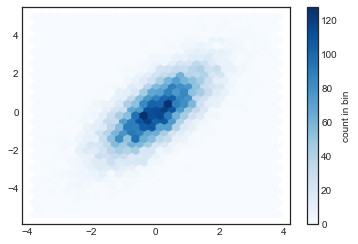

In [51]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

# 核密度估计的可视化

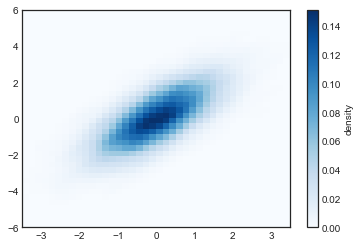

In [55]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

# Part6 配置图列

在matplotlib中自定义图例的位置与风格---plt.legend()

In [4]:
import matplotlib.pyplot as plt
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),'-b',label = 'Sine')
ax.plot(x,np.cos(x),'--r',label = 'Cosine')
ax.axis('equal')
leg = ax.legend()

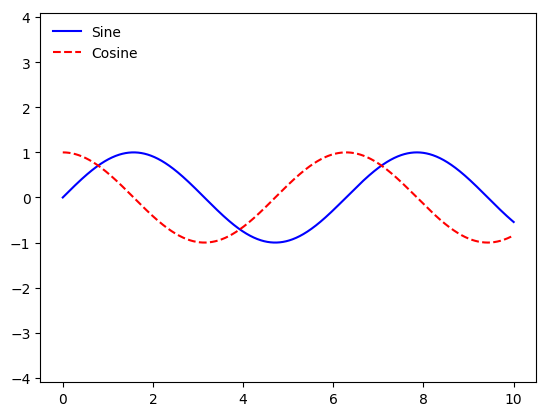

In [5]:
#But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:
ax.legend(loc='upper left', frameon=False)
fig

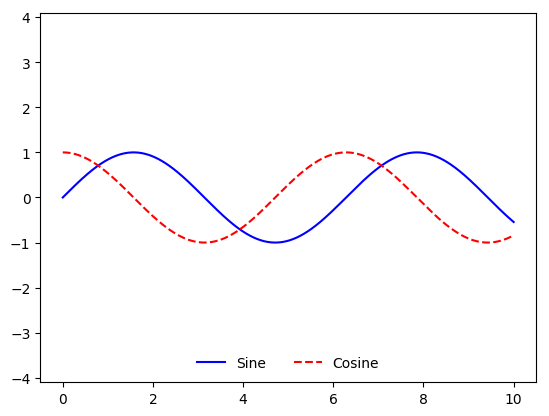

In [6]:
#
#We can use the ncol command to specify the number of columns in the legend:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

# 选择图例显示的元素

As we have already seen, the legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to plt.legend() will tell it which to identify, along with the labels we'd like to specify:

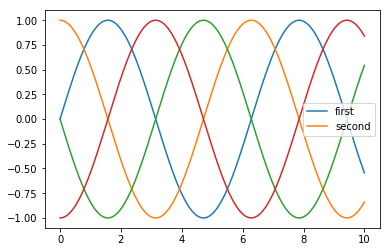

In [7]:
import numpy as np
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

# 在图里中显示不同尺寸的点

下面的示例将用点的尺寸来表明加州不同城市的人口数量：

In [11]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')


In [12]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [13]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

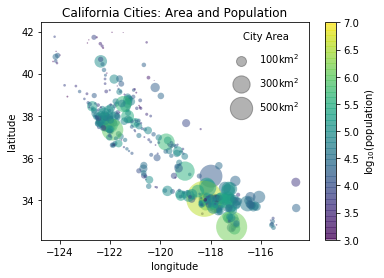

In [15]:
plt.scatter(lon,lat,label=None, c=np.log10(population),cmap = 'viridis',s=area,linewidth =0,alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

#下面创建一个图例
for area in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.3,s=area,label = str(area)+ 'km$^2$')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## 同时显示多个图例

Sometimes when designing a plot you'd like to add multiple legends to the same axes. Unfortunately, Matplotlib does not make this easy: via the standard legend interface, it is only possible to create a single legend for the entire plot. If you try to create a second legend using plt.legend() or ax.legend(), it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level ax.add_artist() method to manually add the second artist to the plot:

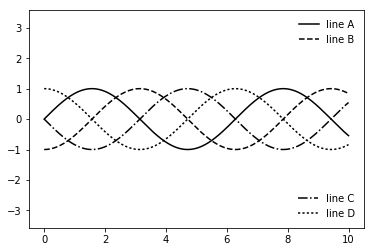

In [16]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

# Part 7 配置颜色条

感觉不是很重要，暂时省略

# Part 8 多子图

The most basic method of creating an axes is to use the plt.axes function. As we've seen previously, by default this creates a standard axes object that fills the entire figure. plt.axes also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent [left, bottom, width, height] in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

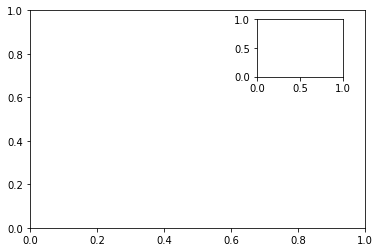

In [17]:
#大框
ax1 = plt.axes()
#小框
ax2 = plt.axes([0.65,0.65,0.2,0.2])

画上下并列的子图：

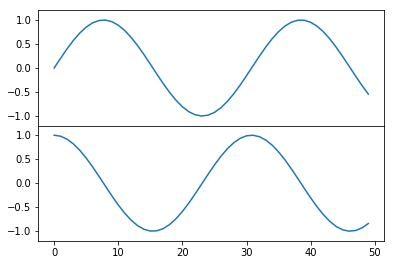

In [18]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

网格状子图

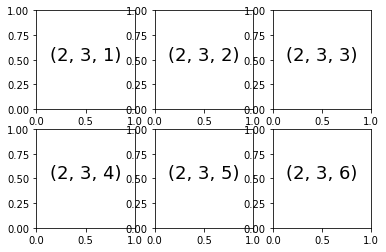

In [19]:
for i in range (1,7):
    plt.subplot(2,3,i)#行数，列数，索引值
    plt.text(0.5,0.5,str((2,3,i)),fontsize = 18, ha ='center')

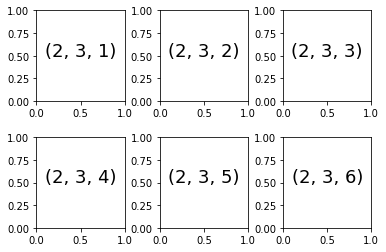

In [21]:
#调整子图间隔：
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4 , wspace = 0.4)
for i in range (1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),fontsize= 18,ha='center')

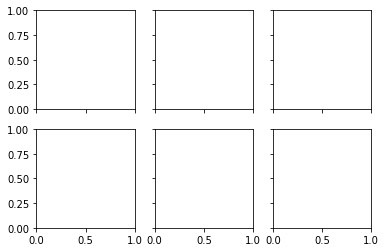

In [25]:
#plt.subplots()的用法：
fig ,ax = plt.subplots(2,3,sharex = 'col',sharey = 'row')

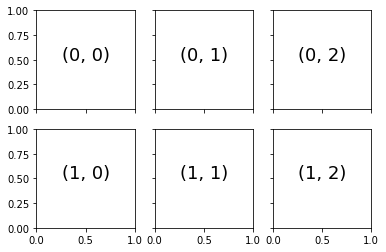

In [26]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

不规则子图： plt.GridSpec, 自己看文档，略去不表

### 用例：可视化多维分布数据

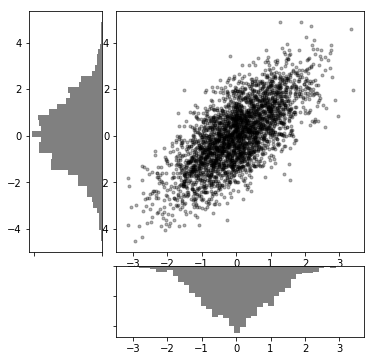

In [28]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=0.2,wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels = [], sharex = main_ax)
#主坐标轴散点图
main_ax.plot(x,y,'ok',markersize = 3,alpha =0.3)
#次坐标轴频次直方图
x_hist.hist(x,40,histtype = 'stepfilled',orientation = 'vertical',color = 'gray')
x_hist.invert_yaxis()
y_hist.hist(y,40,histtype='stepfilled',orientation = 'horizontal',color = 'gray')
y_hist.invert_xaxis()


# Part 9 文字与注释

In [64]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

### 案例：节假日对美国出生率的影响

In [67]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [68]:


quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
#dataframe高性能用法：.query()
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

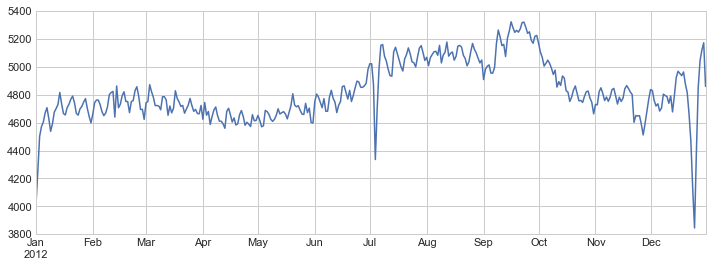

In [69]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

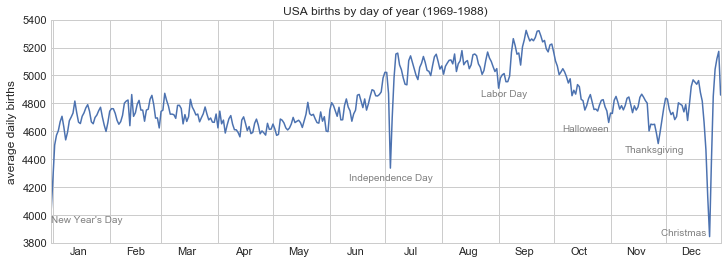

In [70]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

### 箭头与注释

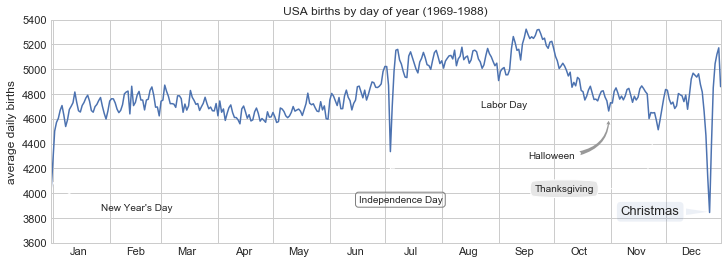

In [71]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

较为费时费力，不建议用matplotlib做箭头与注释的功能

# Part 10自定义坐标轴刻度

# Part 11 Matplotlib自定义： 配置文件与样式表

# Part 12 用Matplotlib 画三维图

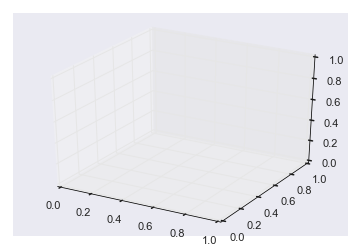

In [60]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
# parameter : projection = '3d'
ax = plt.axes(projection = '3d')

### 三维数据点与线

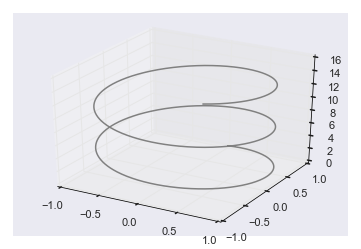

In [61]:
ax = plt.axes(projection='3d')
#线
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

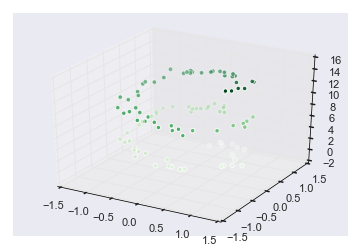

In [63]:
# Data for three-dimensional scattered points
#点
ax = plt.axes(projection='3d')
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# Part 14 用Seaborn做数据可视化

在Seaborn已支持的功能上 ， 其实可以说seaborn的好用程度是完爆matplotlib的

### seaborn vs matplotlib：

In [30]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [31]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

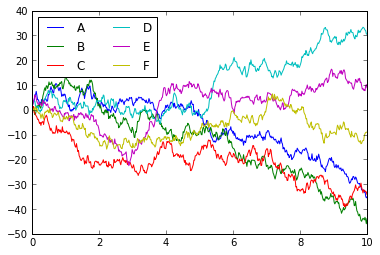

In [32]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

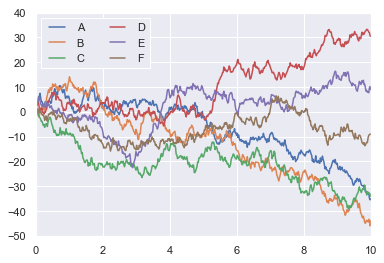

In [33]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

显然是Seaborn做出来的视觉效果更好！

#### Seaborn的频次直方图 KDE 和密度图

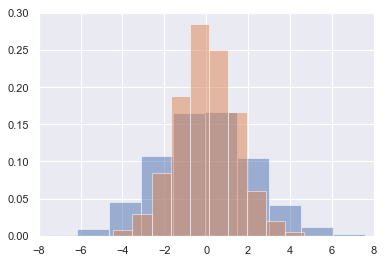

In [34]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

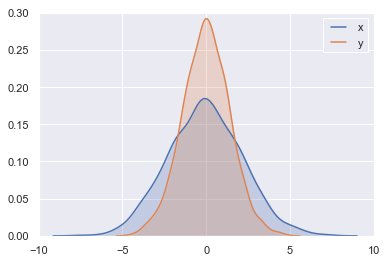

In [35]:
#平滑估计
for col in 'xy':
    sns.kdeplot(data[col],shade = True)

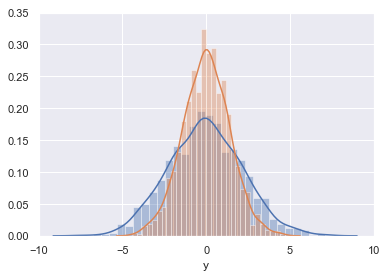

In [36]:
#二合一
sns.distplot(data['x'])
sns.distplot(data['y'])

c:\users\tianjiayang\appdata\local\programs\python\python35-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


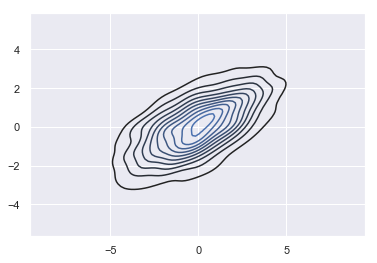

In [37]:
#二维KDE图
sns.kdeplot(data)

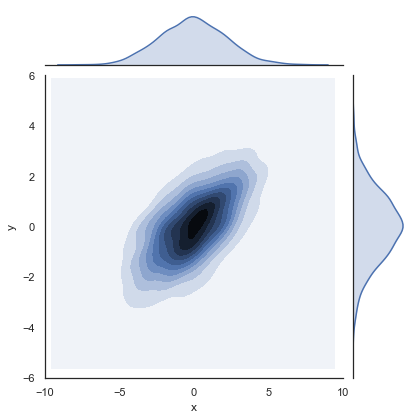

In [38]:
with sns.axes_style('white'):
    sns.jointplot("x","y",data,kind='kde')

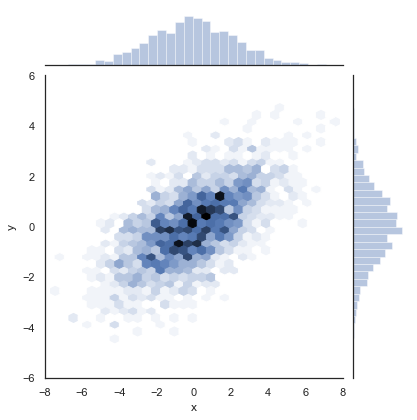

In [39]:
with sns.axes_style('white'):
    sns.jointplot("x","y",data,kind='hex')

#### 矩阵图

经常被用在ml中探索不同维度间的相关性

In [41]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\users\tianjiayang\appdata\local\programs\python\python35-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


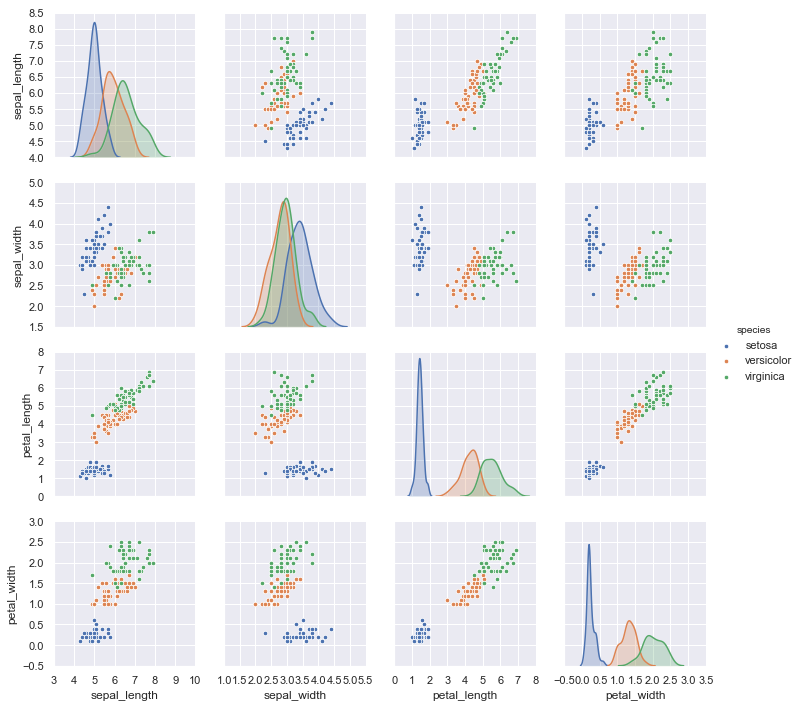

In [42]:
sns.pairplot(iris,hue = 'species',size = 2.5)

#### 分面频次直方图 FacetGrid

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
tips['tip_pct'] = 100* tips['tip'] / tips['total_bill']

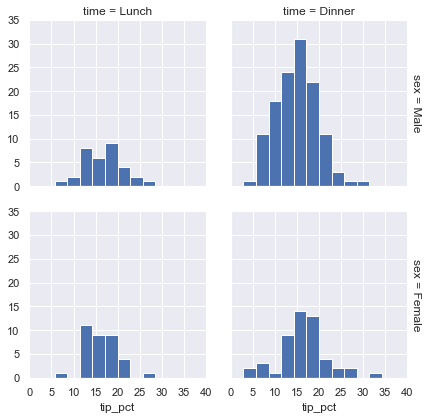

In [45]:
grid = sns.FacetGrid(tips,row = "sex", col='time',margin_titles = True)
grid.map(plt.hist,"tip_pct",bins = np.linspace(0,40,15))

### 因子图 Factor plot

c:\users\tianjiayang\appdata\local\programs\python\python35-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


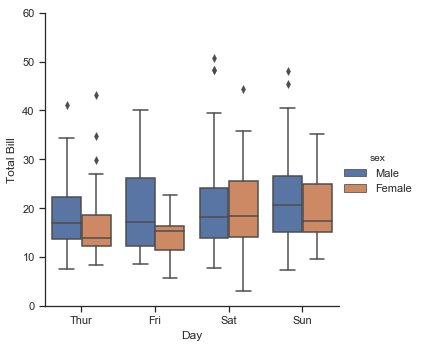

In [46]:
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot("day","total_bill","sex",data=tips,kind="box")
    g.set_axis_labels("Day","Total Bill")

### 联合分布

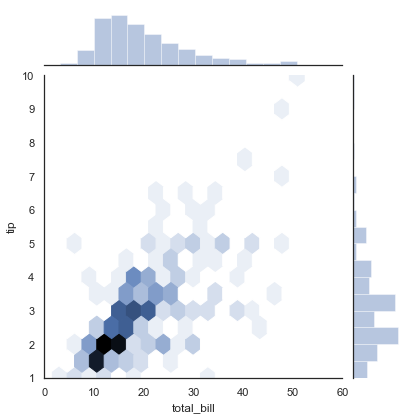

In [47]:
with sns.axes_style('white'):
    sns.jointplot("total_bill","tip",data=tips,kind='hex')

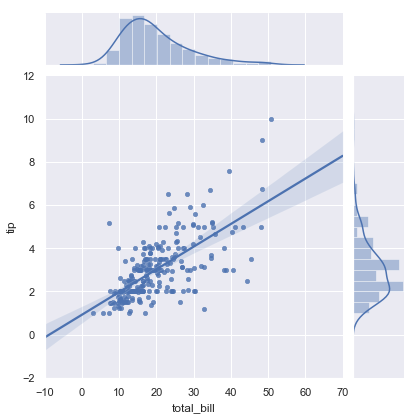

In [48]:
#利用 联合分布图自动进行KDE和回归
sns.jointplot("total_bill","tip",data= tips,kind='reg')

### 条形图 ： 针对时间序列数据

In [52]:
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


c:\users\tianjiayang\appdata\local\programs\python\python35-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


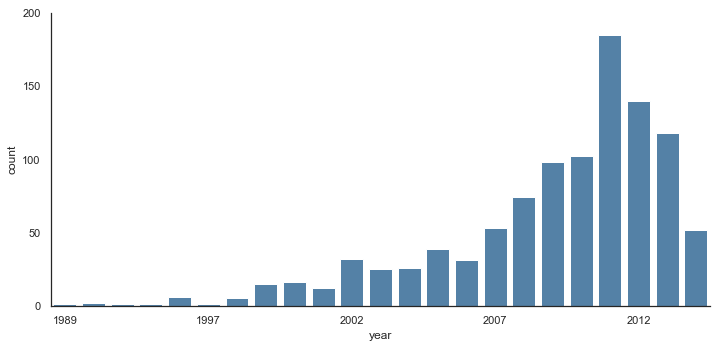

In [51]:
with sns.axes_style('white'):
    g = sns.factorplot("year",data=planets, aspect=2,kind="count",color="steelblue")
    g.set_xticklabels(step=5)

c:\users\tianjiayang\appdata\local\programs\python\python35-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


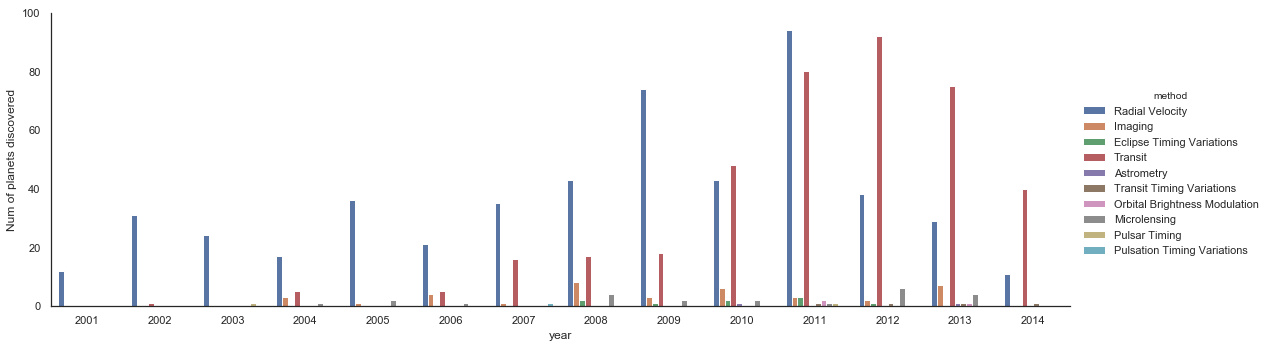

In [55]:
#利用method参数发现行星的数量：
with sns.axes_style('white'):
    g = sns.factorplot("year",data=planets,aspect=3.0,kind='count',hue='method',order=range(2001,2015))
    g.set_ylabels('Num of planets discovered')